eP: 0


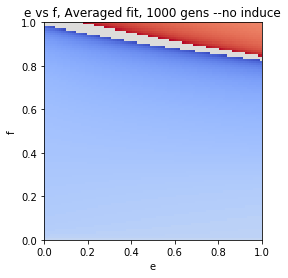

eP: 1


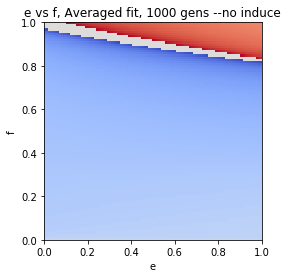

eP: 2


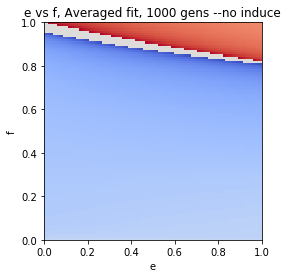

eP: 3


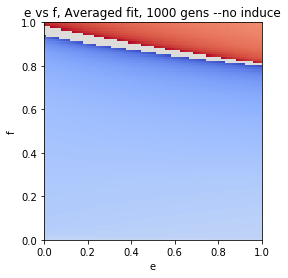

eP: 4


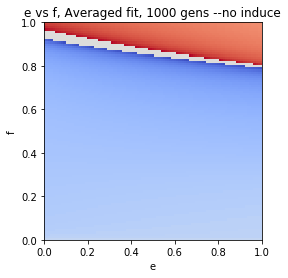

eP: 5


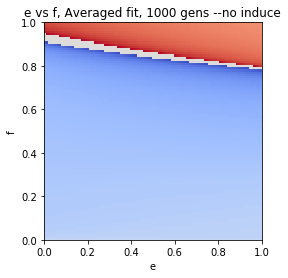

eP: 6


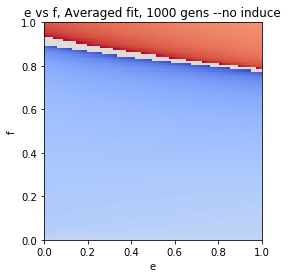

eP: 7


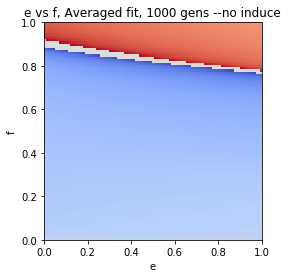

eP: 8


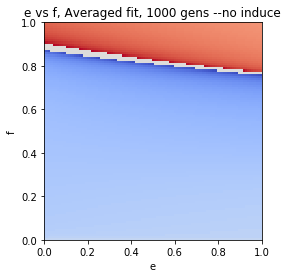

eP: 9


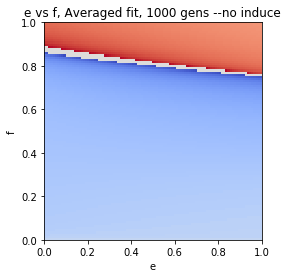

eP: 10


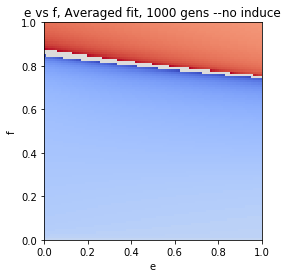

eP: 11


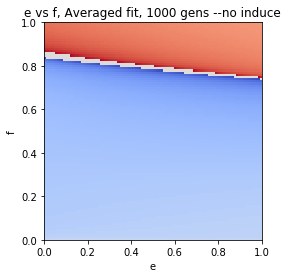

eP: 12


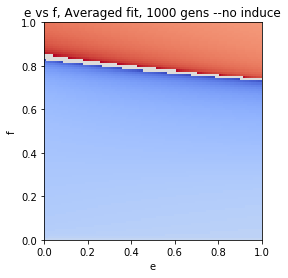

eP: 13


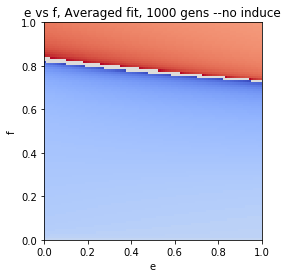

eP: 14


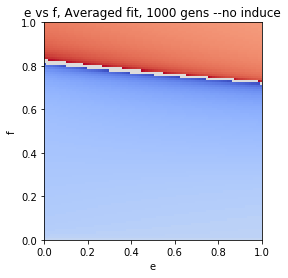

eP: 15


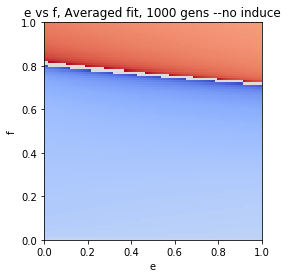

eP: 16


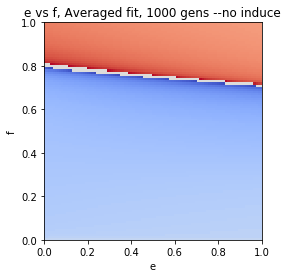

eP: 17


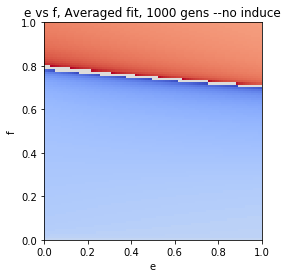

eP: 18


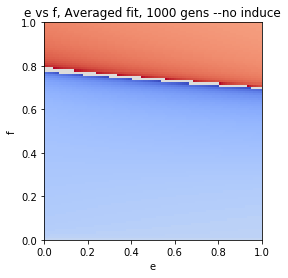

eP: 19


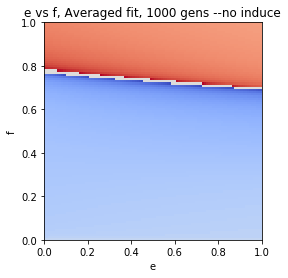

eP: 20


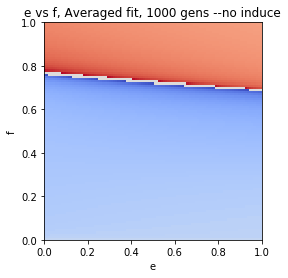

eP: 21


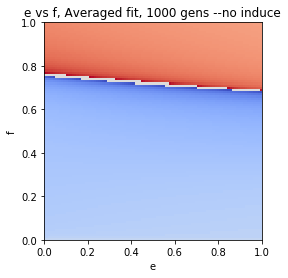

eP: 22


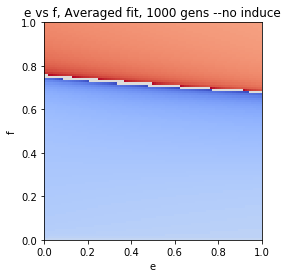

eP: 23


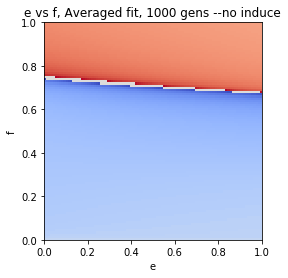

eP: 24


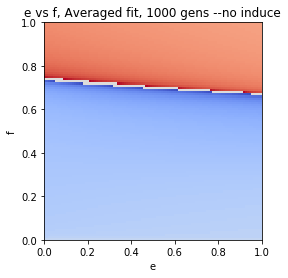

eP: 25


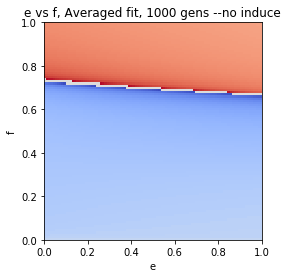

eP: 26


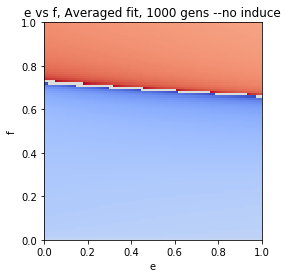

eP: 27


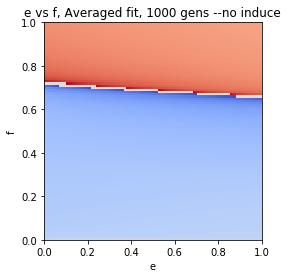

eP: 28


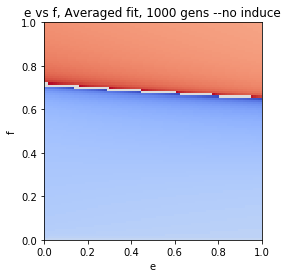

eP: 29


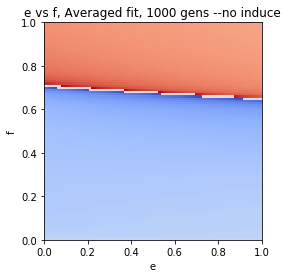

eP: 30


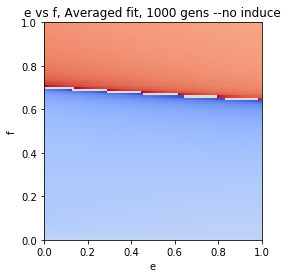

eP: 31


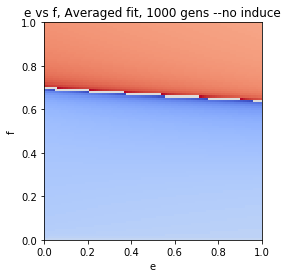

eP: 32


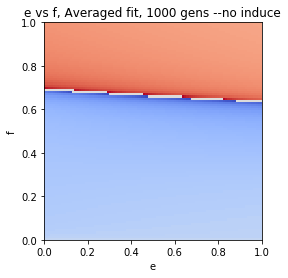

eP: 33


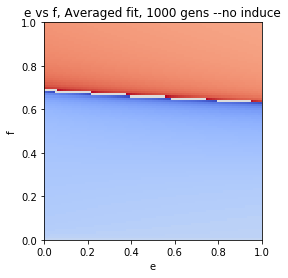

eP: 34


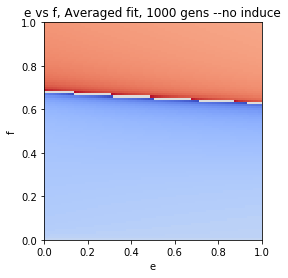

eP: 35


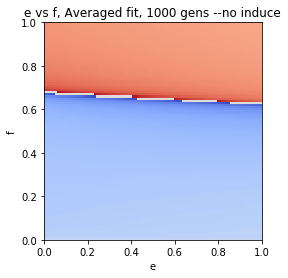

eP: 36


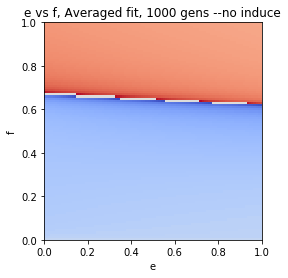

eP: 37


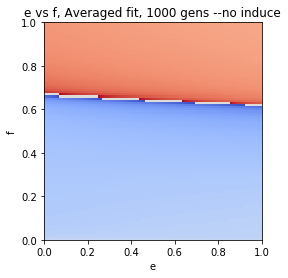

eP: 38


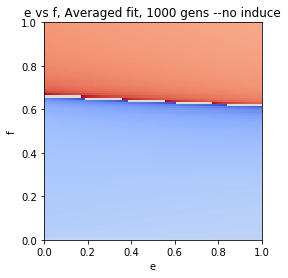

eP: 39


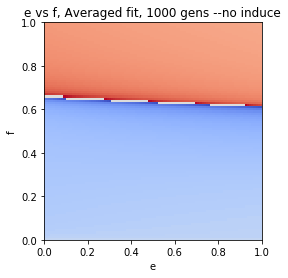

eP: 40


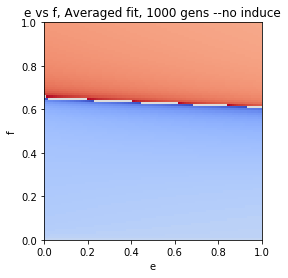

eP: 41


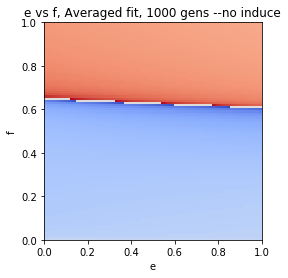

eP: 42


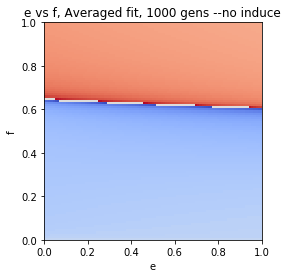

eP: 43


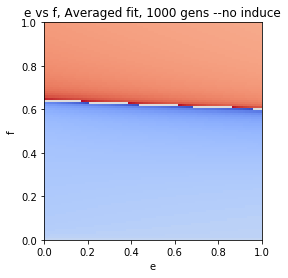

eP: 44


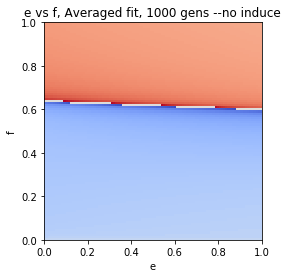

eP: 45


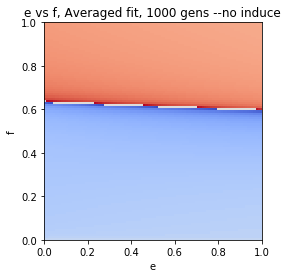

eP: 46


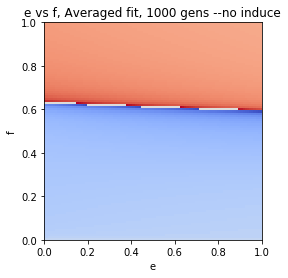

eP: 47


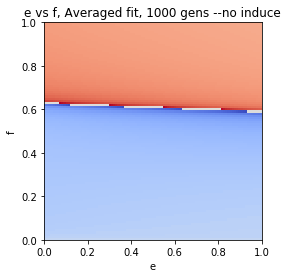

eP: 48


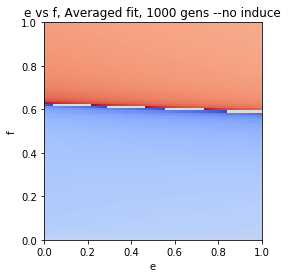

eP: 49


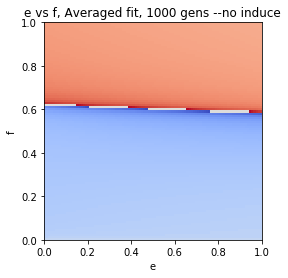

eP: 50


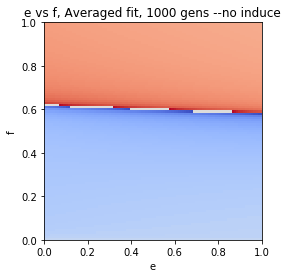

eP: 51


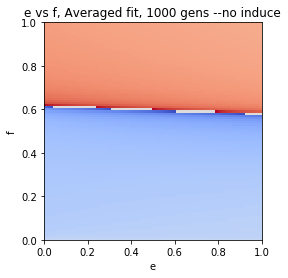

eP: 52


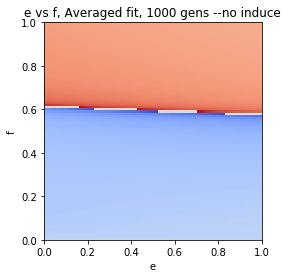

eP: 53


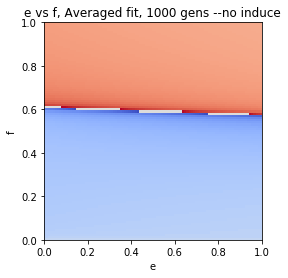

eP: 54


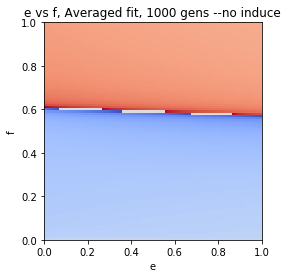

eP: 55


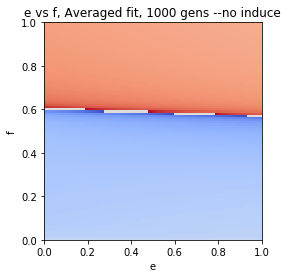

eP: 56


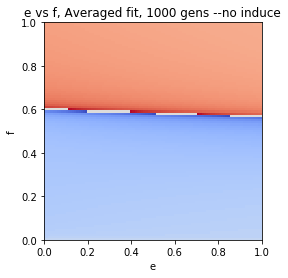

eP: 57


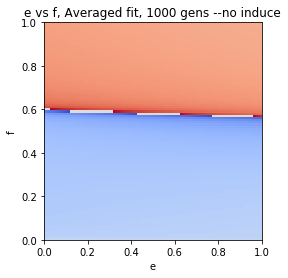

eP: 58


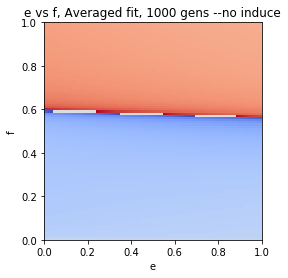

eP: 59


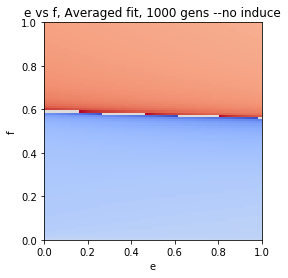

eP: 60


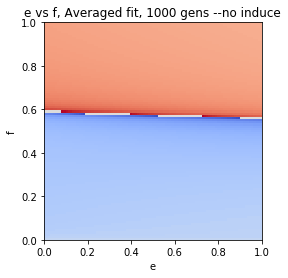

eP: 61


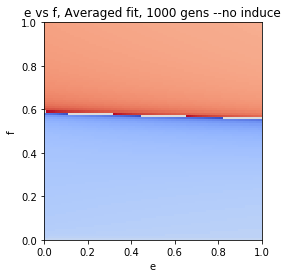

eP: 62


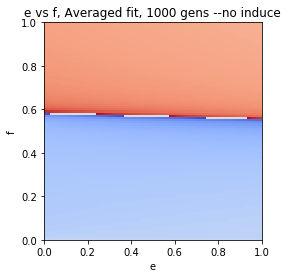

eP: 63


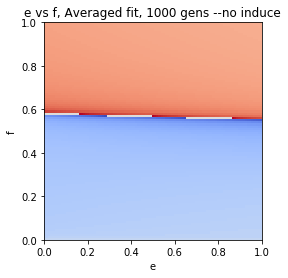

eP: 64


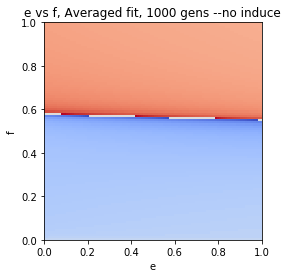

eP: 65


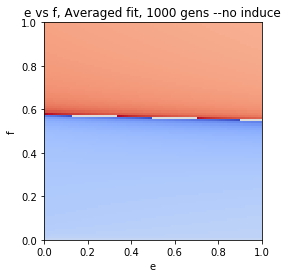

eP: 66


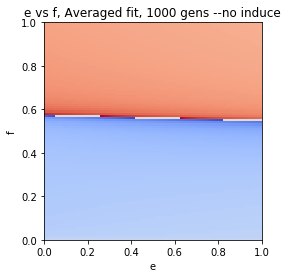

eP: 67


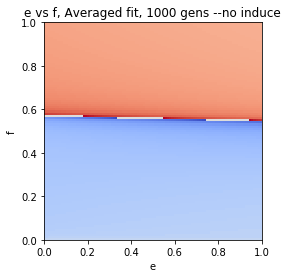

eP: 68


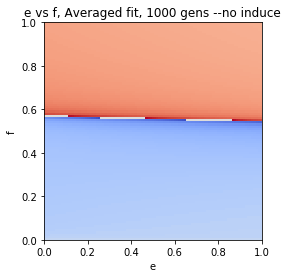

eP: 69


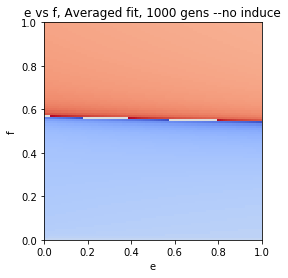

eP: 70


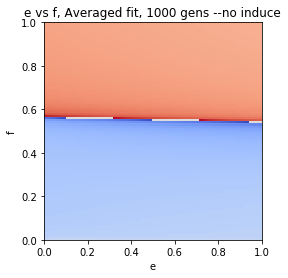

eP: 71


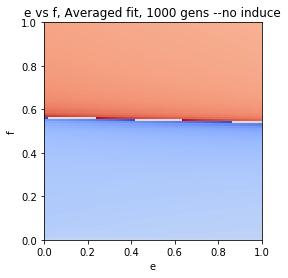

eP: 72


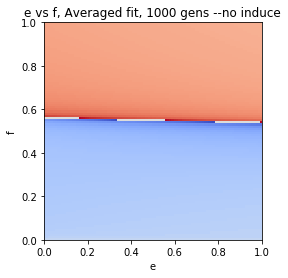

eP: 73


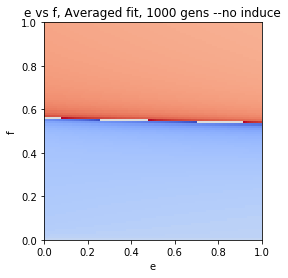

eP: 74


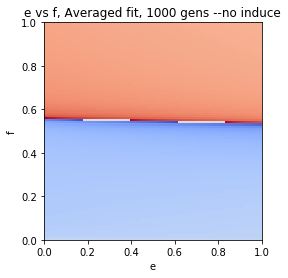

eP: 75


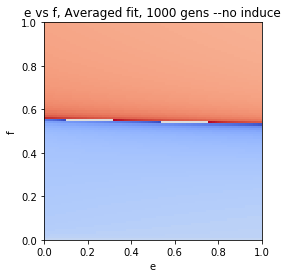

eP: 76


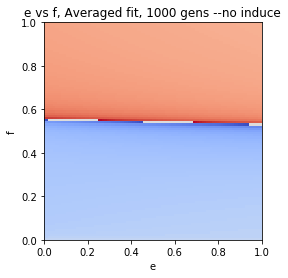

eP: 77


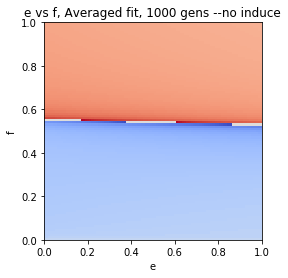

eP: 78


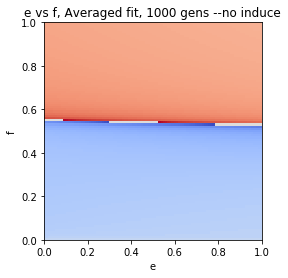

eP: 79


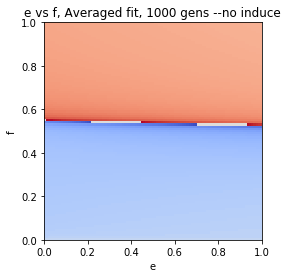

eP: 80


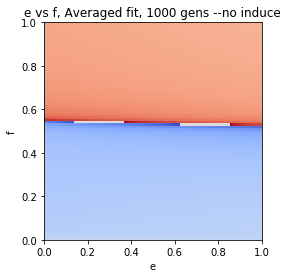

eP: 81


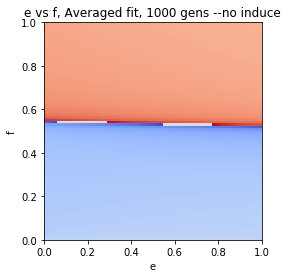

eP: 82


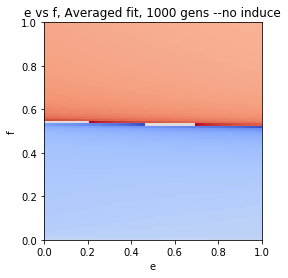

eP: 83


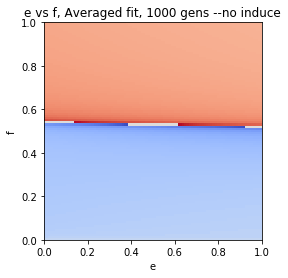

eP: 84


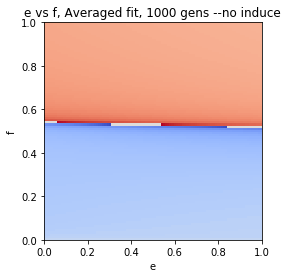

eP: 85


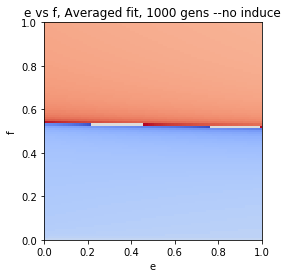

eP: 86


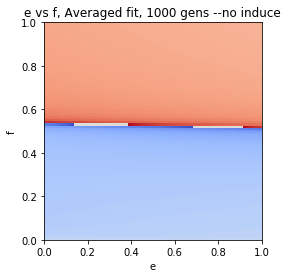

eP: 87


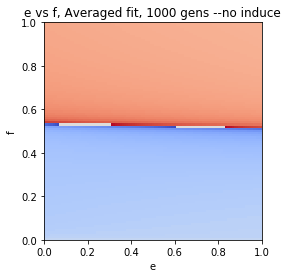

eP: 88


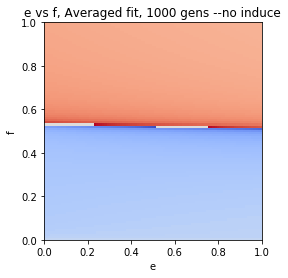

eP: 89


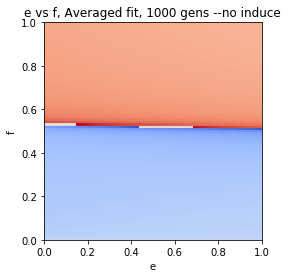

eP: 90


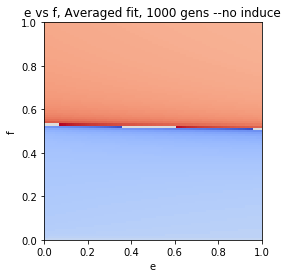

eP: 91


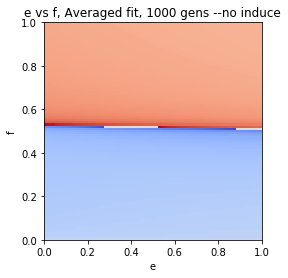

eP: 92


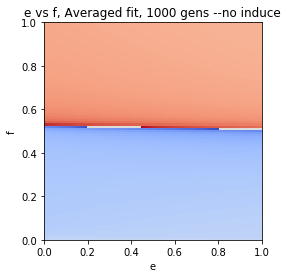

eP: 93


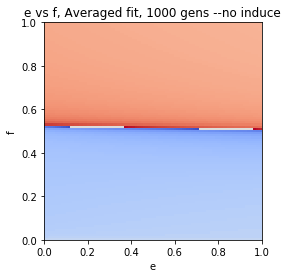

eP: 94


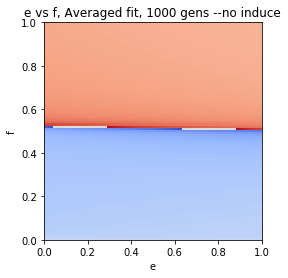

eP: 95


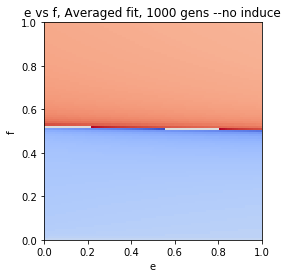

eP: 96


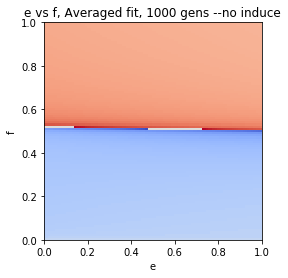

eP: 97


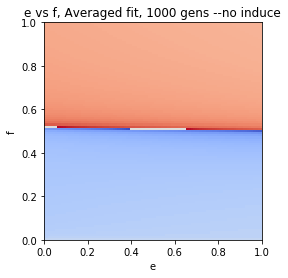

eP: 98


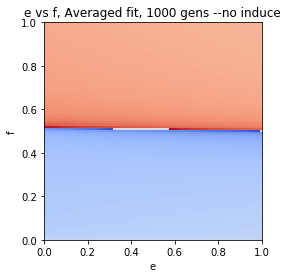

eP: 99


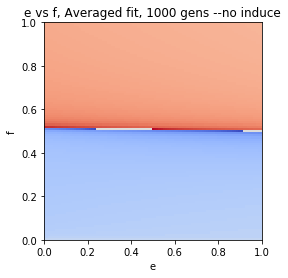

eP: 100


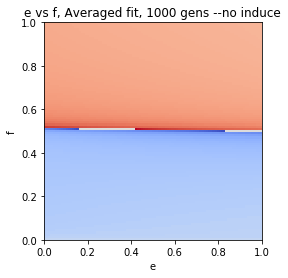

[98. 98. 98. 98. 98. 97. 97. 97. 97. 97. 96. 96. 96. 96. 96. 95. 95. 95.
 95. 95. 94. 94. 94. 94. 94. 94. 93. 93. 93. 93. 93. 92. 92. 92. 92. 92.
 92. 91. 91. 91. 91. 91. 91. 90. 90. 90. 90. 90. 90. 89. 89. 89. 89. 89.
 89. 89. 88. 88. 88. 88. 88. 88. 88. 87. 87. 87. 87. 87. 87. 87. 86. 86.
 86. 86. 86. 86. 86. 85. 85. 85. 85. 85. 85. 85. 85. 84. 84. 84. 84. 84.
 84. 84. 83. 83. 83. 83. 83. 83. 83. 83. 82.]


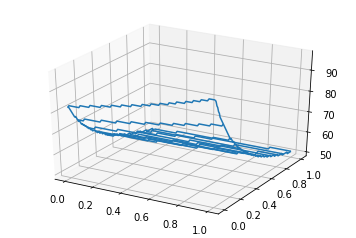

[82. 83. 83. 83. 83. 83. 83. 83. 83. 84. 84. 84. 84. 84. 84. 84. 85. 85.
 85. 85. 85. 85. 85. 85. 86. 86. 86. 86. 86. 86. 86. 87. 87. 87. 87. 87.
 87. 87. 88. 88. 88. 88. 88. 88. 88. 89. 89. 89. 89. 89. 89. 89. 90. 90.
 90. 90. 90. 90. 91. 91. 91. 91. 91. 91. 92. 92. 92. 92. 92. 92. 93. 93.
 93. 93. 93. 94. 94. 94. 94. 94. 94. 95. 95. 95. 95. 95. 96. 96. 96. 96.
 96. 97. 97. 97. 97. 97. 98. 98. 98. 98. 98.]


In [6]:

# coding: utf-8

# In[2]:


#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


# In[3]:


#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()


# In[4]:


def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict


# In[5]:


def run_generation_iE(simData):
    #apply fitness
    qW=simData['qW']*simData['fW']
    qD=simData['qD']*simData['fD']
    qH=simData['qH']*simData['fH']
    #bring total frequency back up to 1
    total=qW+qD+qH
    qW/=total
    qD/=total
    qH/=total
    a=simData['a']
    e=a*simData['eP']+(1-a)*simData['e']
    #variables to prvent redundant multiplication
    w2=qW*qW
    wd=qW*qD
    wh=qW*qH
    d2=qD*qD
    dh=qD*qH
    h2=qH*qH
    #calculate next gen frequencies
    qWP=w2+wh+.25*h2
    qDP=e*(2*wd+wh+dh+.5*h2)+d2+dh+.25*h2
    qHP=(1-e)*(2*wd+wh+dh+.5*h2)
    #catch rounding errors from float multiplication
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}
    

def run_simulation_iE(simData,graph=False,table=False):
    simData['fH']=(simData['fW']+simData['fD'])/2
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    alphaHold=simData['a']
    for i in range(1,simData['generations']+1):
        if i<=simData['induceStart']:
            simData['a']=0
        else:
            simData['a']=alphaHold
        

        update_vars(simData,run_generation_iE(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plot_2D(graphInfo)
    if table:
        print(pd.DataFrame(graphInfo))
    return 0





xvs=np.arange(0,1.01,.01)
alphas=np.arange(0,1.01,.01)
aB,xB=np.meshgrid(alphas,xvs)
zMaxBlues=np.zeros((len(xvs),len(alphas)))


ePs=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
ePs=np.arange(0,1.01,.01)
for ePi in range(len(ePs)):
    print('eP: '+str(ePi))
    eP=ePs[ePi]
    xVals=np.arange(0,1.01,.01)
    yVals=np.arange(0,1.01,.01)
    X,Y=np.meshgrid(xVals,yVals)
    Z=np.zeros((len(xVals),len(yVals)))
    #run 2D sim e vs f
    for xIndex in range(len(xVals)):
        #x is e
        #print('e: '+str(xVals[xIndex]))
        for yIndex in range(len(yVals)):
            #y is f
            simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':yVals[yIndex],'fH':.9,'e':xVals[xIndex],'eP':eP,'a':.9,'generations':1000,'induceStart':10}
            simData['fH']=(simData['fW']+simData['fD'])/2

            takeover=run_simulation_iE(simData)
            Z[yIndex,xIndex]=takeover
    model3D(X,Y,Z,'e','f','e vs f, Averaged fit, 1000 gens --no induce')
    
    
    for i in range(len(Z)):
        #print(Z[i])
        col=''
        max=0
        for j in range(len(Z[i])):
            col+=str(Z[j][i])+','
            if j>max and Z[j][i]<0:
                max=j
        col+='-'
        #print(col)
        #print(max)
        zMaxBlues[ePi][i]=max

    


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


#surf = ax.plot_surface(xB, aB, zMaxBlues, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)




    


for i in range(len(zMaxBlues)):
    print(zMaxBlues[i])
    break

for i in range(len(zMaxBlues)):
    for j in range(len(zMaxBlues[0])//2):
        temp=zMaxBlues[i][j]

        zMaxBlues[i][j]=zMaxBlues[i][len(zMaxBlues[0])-1-j]
        zMaxBlues[i][len(zMaxBlues[0])-1-j]=temp
# In[35]:
zMaxBlues=np.array(zMaxBlues)
ax.plot_wireframe(aB, xB, zMaxBlues, rstride=10, cstride=100)
plt.show()

for i in range(len(zMaxBlues)):
    print(zMaxBlues[i])
    break



In [7]:
print(len(aB))
print(len(xB))
print(len(aB[0]))
print(len(xB[0]))
print(len(zMaxBlues))
print(len(zMaxBlues[0]))

101
101
101
101
101
101


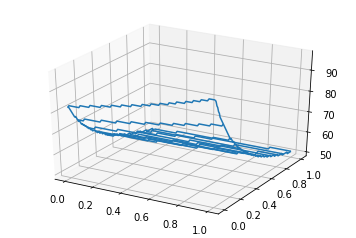

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')
#zMaxBlues=np.array(zMaxBlues)
ax.plot_wireframe(aB, xB, zMaxBlues, rstride=10, cstride=100)
plt.show()